# darknet으로 yolo로 학습

참고 : https://rio-kim.github.io/yolo/2020/05/14/yolo-v3-custom-data-train/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [8]:
%cd drive/My Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive/darknet


In [5]:
# !git clone https://github.com/AlexeyAB/darknet.git  # 깃허브 다운로드!

Cloning into 'darknet'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 14163 (delta 5), reused 12 (delta 5), pack-reused 14148
Receiving objects: 100% (14163/14163), 12.75 MiB | 7.77 MiB/s, done.
Resolving deltas: 100% (9624/9624), done.
Checking out files: 100% (2014/2014), done.


In [3]:
%cd darknet

/content/drive/My Drive/darknet


In [10]:
!ls

3rdparty		 darknet		 net_cam_v3.sh
backup			 darknet53.conv.74	 net_cam_v4.sh
bad_label.list		 DarknetConfig.cmake.in  obj
bad.list		 darknet_images.py	 predictions.jpg
build			 darknet.py		 README.md
build.ps1		 darknet_video.py	 results
build.sh		 data			 scripts
cfg			 image_yolov3.sh	 src
chart.png		 image_yolov4.sh	 video_yolov3.sh
chart_yolov3-custom.png  include		 video_yolov4.sh
cmake			 json_mjpeg_streams.sh	 yolov3.weights
CMakeLists.txt		 LICENSE
custom_data		 Makefile


In [38]:
!chmod +x *.sh

In [4]:
!make  # Makefile 내용 적용!

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...thi

In [36]:
!export DISPLAY=0:0

In [9]:
!wget https://pjreddie.com/media/files/darknet53.conv.74   # 일반 모델 다운로드!

--2020-08-05 17:45:29--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   218KB/s    in 10m 42s 

2020-08-05 17:56:12 (247 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [12]:
!wget https://pjreddie.com/media/files/yolov3.weights  # 학습된 가중치 다운로드!

--2020-08-05 18:00:26--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   442KB/s    in 14m 14s 

2020-08-05 18:14:42 (284 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [5]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [9]:
!chmod +x linux_mark.sh
!./linux_mark.sh

chmod: cannot access 'linux_mark.sh': No such file or directory
/bin/bash: ./linux_mark.sh: No such file or directory


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 

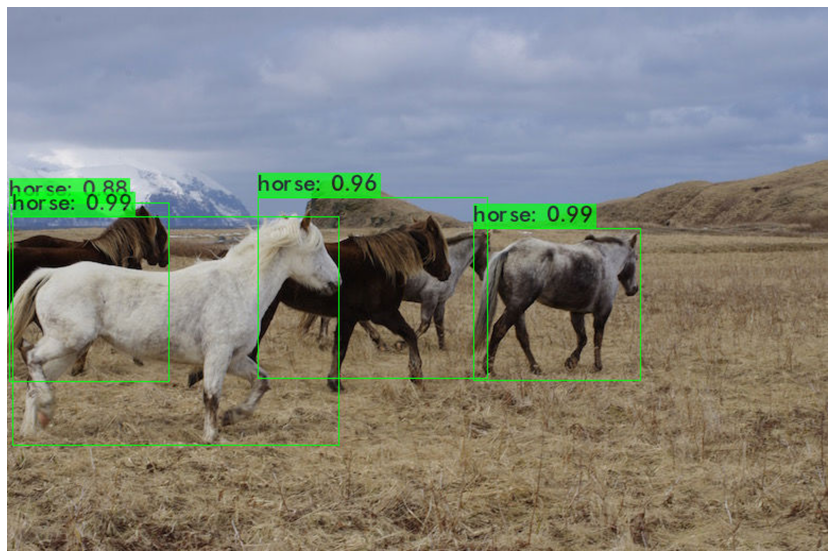

In [9]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/horses.jpg

imShow('predictions.jpg')   # 기존의 coco data 예시 돌려보기!

In [7]:
!./darknet detector train custom_data/detector.data cfg/yolov3-custom.cfg darknet53.conv.74 -gpu 0 -mjpeg_port 8090 -map -dont_show
# 2시간 동안 970 epoch 정도 학습!

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.619557, GIOU: 0.591951), Class: 0.913354, Obj: 0.479073, No Obj: 0.002610, .5R: 0.687500, .75R: 0.375000, count: 16, class_loss = 2.824124, iou_loss = 3.516146, total_loss = 6.340271 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000014, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000056, iou_loss = 0.000000, total_loss = 0.000056 
 total_bbox = 263257, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.761322, GIOU: 0.754936), Class: 0.992031, Obj: 0.974917, No Obj: 0.007107, .5R: 1.000000, .75R: 0.600000, count: 5, class_loss = 0.134606, iou_loss = 0.230946, total_loss = 0.365552 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.727875, GIOU: 0.718155), Class: 0.965222, Obj: 0.621911, No Obj: 0.004197, .5R

In [11]:
!./darknet detector test custom_data/detector.data cfg/yolov3-custom.cfg backup/yolov3-custom_last.weights custom_data/image/사과_15.jpg -dont-show    # 학습안된거 결과 예시!

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 

In [19]:
!./darknet detector map custom_data/detector.data cfg/yolov3-custom.cfg backup/yolov3-custom_last.weights  # 모델 평가!

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

## 결과

- custom data를 학습시켜 봄으로써 yolo사용의 감을 익혀봄.
- data가 많아야 testset에서 효과가 더 좋을 거 같음.
- c언어 기반이라 수정 부분에서 어려움 -> tensorflow, pytorch로 